<a href="https://colab.research.google.com/github/KayMichnicki/Introduction/blob/main/Credit_Default_Risk_for_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Home Credit Default Risk

Explore to see what features have effects on home loans.


## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Credit Card Default Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/train_data.csv')

In [4]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,410704,0,Cash loans,F,N,Y,1,157500.0,900000.0,26446.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,381230,0,Cash loans,F,N,Y,1,90000.0,733176.0,21438.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
2,450177,0,Cash loans,F,Y,Y,0,189000.0,1795500.0,62541.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,332445,0,Cash loans,M,Y,N,0,175500.0,494550.0,45490.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,357429,0,Cash loans,F,Y,Y,0,270000.0,1724688.0,54283.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23385,144504,0,Cash loans,F,Y,N,0,108000.0,161730.0,8770.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
23386,225314,0,Cash loans,F,Y,Y,0,121500.0,603000.0,17761.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
23387,111500,0,Cash loans,M,Y,Y,0,180000.0,592560.0,32274.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23388,325350,0,Cash loans,F,N,Y,0,261000.0,521280.0,31630.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [5]:
print(df.shape)
print(df.columns)
df.head()

(23390, 122)
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,410704,0,Cash loans,F,N,Y,1,157500.0,900000.0,26446.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,381230,0,Cash loans,F,N,Y,1,90000.0,733176.0,21438.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
2,450177,0,Cash loans,F,Y,Y,0,189000.0,1795500.0,62541.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,332445,0,Cash loans,M,Y,N,0,175500.0,494550.0,45490.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,357429,0,Cash loans,F,Y,Y,0,270000.0,1724688.0,54283.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Get numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Get categorical (non-numeric) columns
cat_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print("Numerical Columns:", num_cols[:5])   # just show a few
print("Categorical Columns:", cat_cols[:5])

Numerical Columns: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']
Categorical Columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE']


In [7]:
df.isna().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,3120
AMT_REQ_CREDIT_BUREAU_WEEK,3120
AMT_REQ_CREDIT_BUREAU_MON,3120
AMT_REQ_CREDIT_BUREAU_QRT,3120


In [8]:
df["AMT_REQ_CREDIT_BUREAU_DAY"].unique()


array([ 0., nan,  1.,  6.,  2.,  3.,  9.,  8.])

In [9]:
df["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts()


,count
AMT_REQ_CREDIT_BUREAU_DAY,
0.0,20167
1.0,89
2.0,7
3.0,3
6.0,2
9.0,1
8.0,1


In [10]:
df["NAME_CONTRACT_TYPE"].unique()


array(['Cash loans', 'Revolving loans'], dtype=object)

In [11]:
# View relationships between all data:
# sns.pairplot(df)

# Plot 10 Most Relevant Features

## Income Distribution (Open AI, 2025)

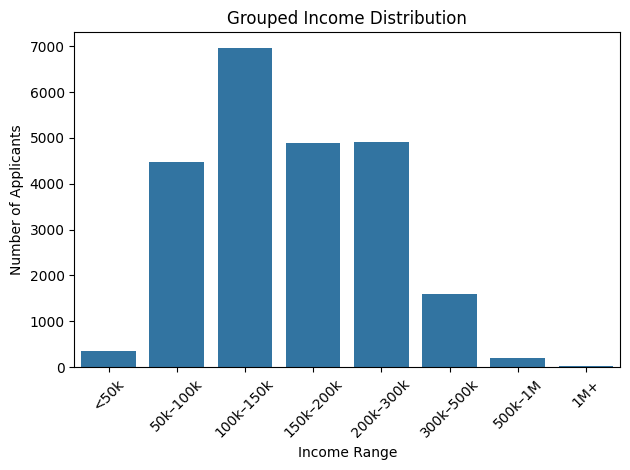

In [12]:
income_bins = [0, 50000, 100000, 150000, 200000, 300000, 500000, 1000000, df['AMT_INCOME_TOTAL'].max()]
income_labels = ['<50k', '50k–100k', '100k–150k', '150k–200k', '200k–300k', '300k–500k', '500k–1M', '1M+']
df['INCOME_GROUP'] = pd.cut(df['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels)

sns.countplot(data=df, x='INCOME_GROUP', order=income_labels)
plt.title("Grouped Income Distribution")
plt.ylabel("Number of Applicants")
plt.xlabel("Income Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The Income vairable helps us to understand the total annual income of the applicant whether it follows a bell curve or is skewed. Income is imporatant because it is an indicator of financial stability and ability to pay back the loand. If the data is highly skewed, preprocessing steps such as normalization or transformation may be needed. Grouping income into categories like low, medium, and high can simplify the analysis, reduce noise, and help avoid issues with high dimensionality.

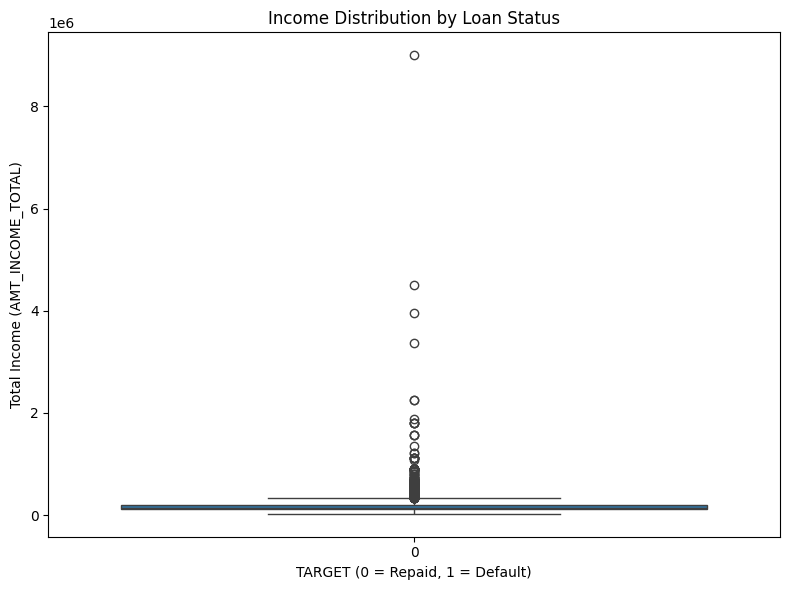

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='TARGET', y='AMT_INCOME_TOTAL')
plt.title("Income Distribution by Loan Status")
plt.xlabel("TARGET (0 = Repaid, 1 = Default)")
plt.ylabel("Total Income (AMT_INCOME_TOTAL)")
plt.tight_layout()
plt.show()

<ipython-input-17-30cb0618b989>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_avg_credit = df.groupby('INCOME_GROUP')['AMT_CREDIT'].mean().reindex(income_labels)


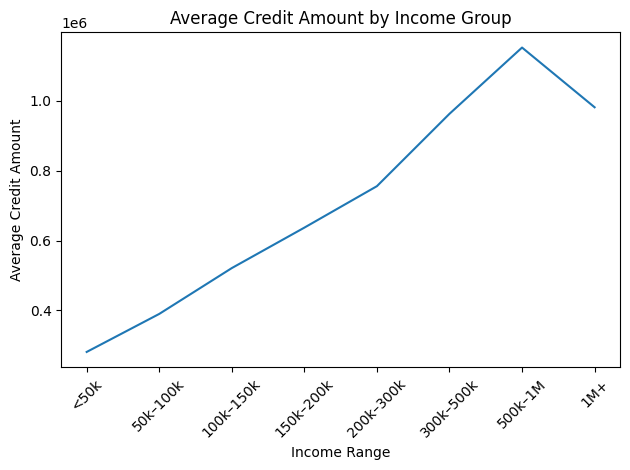

In [17]:
# Calculate average AMT_CREDIT
income_avg_credit = df.groupby('INCOME_GROUP')['AMT_CREDIT'].mean().reindex(income_labels)

# Plot using sns.lineplot
sns.lineplot(x=income_labels, y=income_avg_credit.values)
plt.title("Average Credit Amount by Income Group")
plt.ylabel("Average Credit Amount")
plt.xlabel("Income Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This graph shows a clear positive relationship between income and average credit amount, indicating that applicants with higher incomes tend to request or receive more creditsugecting that Amount Income is a meaningful feature for predicting credit behavior and should be included in the model.

Additionally, the drop at the highest income group hints at a nonlinear pattern, very high income earners perhaps do not need to borrow as much.

## Credit Amount (Open AI, 2025)

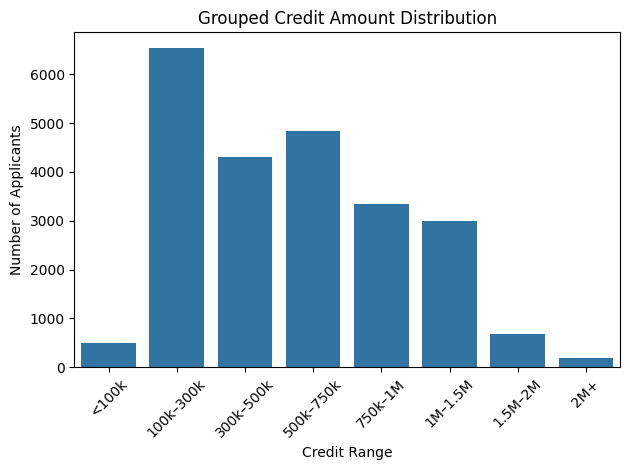

In [15]:
credit_bins = [0, 100000, 300000, 500000, 750000, 1000000, 1500000, 2000000, df['AMT_CREDIT'].max()]
credit_labels = ['<100k', '100k–300k', '300k–500k', '500k–750k', '750k–1M', '1M–1.5M', '1.5M–2M', '2M+']
df['CREDIT_GROUP'] = pd.cut(df['AMT_CREDIT'], bins=credit_bins, labels=credit_labels)

sns.countplot(data=df, x='CREDIT_GROUP', order=credit_labels)
plt.title("Grouped Credit Amount Distribution")
plt.ylabel("Number of Applicants")
plt.xlabel("Credit Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Line Plot
sns.lineplot(x=credit_labels, y=credit_bins.values)
plt.title("Number of Applicants by Credit Amount Group")
plt.ylabel("Number of Applicants")
plt.xlabel("Credit Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AttributeError: 'list' object has no attribute 'values'

Again, the data can be converted to low, meidum and high for the same reason above. We also have class imablance in this case. It is important to consider how a model might generalize for classes that have very few data compared to others. Credit amount is an important feature beacuse it has great effects on borrowers' ability to pay back. If the loan amount is high, then it is harder to make monthly payment when they lose their jobs or the income is gone.

## Children Count

Skipping SK_ID_CURR (too many unique values: 23390)


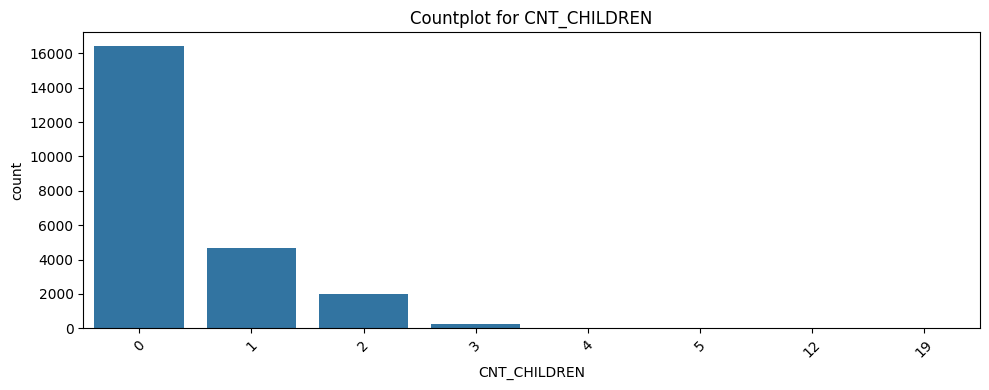

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to visualize
cols_to_plot = ['SK_ID_CURR','CNT_CHILDREN']

for col in cols_to_plot:
    unique_vals = df[col].nunique()
    if unique_vals <= 50:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=col)
        plt.title(f"Countplot for {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping {col} (too many unique values: {unique_vals})")

This graph looks at the number of children count and majaority of the count goes toward o children. The numbers of applicants decreased significantly compared to the ones with no children. This seems to be contrary to the popular beleive that many home ownsers are families with children. Perhaps, applicants with children often have finacial burden such as extra costs for food, entertainment, school related costs and more.

## Annuity Amount (Open AI, 2025)

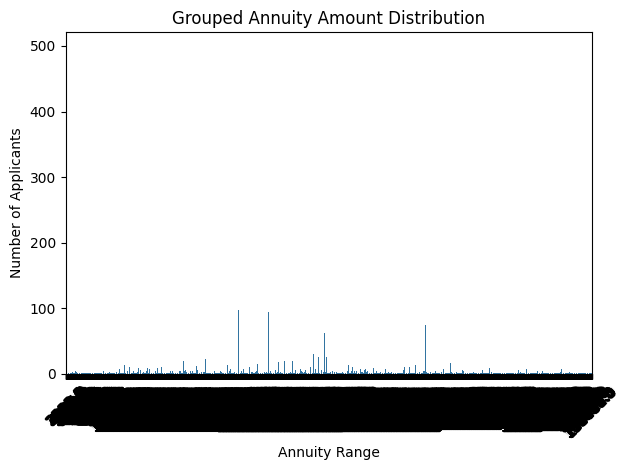

In [21]:
# Annuity Bar Plot for Grouped Data by Amount
sns.countplot(data=df, x='AMT_ANNUITY')
plt.title("Grouped Annuity Amount Distribution")
plt.ylabel("Number of Applicants")
plt.xlabel("Annuity Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

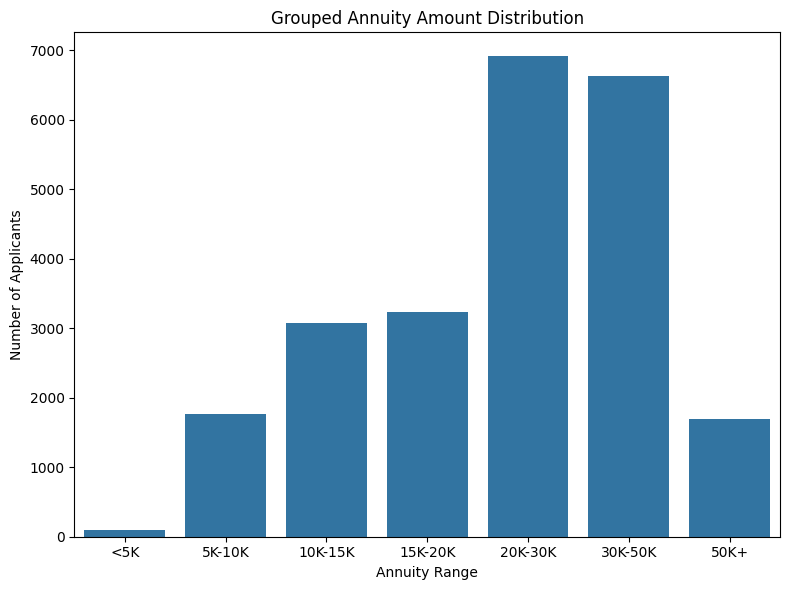

In [22]:
# Separate data into bins:
bins = [0, 5000, 10000, 15000, 20000, 30000, 50000, df['AMT_ANNUITY'].max()]
labels = ['<5K', '5K-10K', '10K-15K', '15K-20K', '20K-30K', '30K-50K', '50K+']

# Create a binned column
df['AnnuityRange'] = pd.cut(df['AMT_ANNUITY'], bins=bins, labels=labels)

# Plot
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='AnnuityRange', order=labels)
plt.title("Grouped Annuity Amount Distribution")
plt.xlabel("Annuity Range")
plt.ylabel("Number of Applicants")
plt.tight_layout()
plt.show()

This graph shows that most applicants have annuity amounts between 20K and 50K, with fewer applicants at very low or very high annuity levels. Grouping annuity values like this helps simplify the data, manage outliers, and make it easier to analyze trends. It also sets up a clear way to compare default risk across different annuity ranges. For home loan, an annuity is the regular monthly payment that a borrower agrees to pay over the life of the loan. It includes both principal and interest and is usually fixed throughout the repayment term like 30 years.

## Gender Distribution

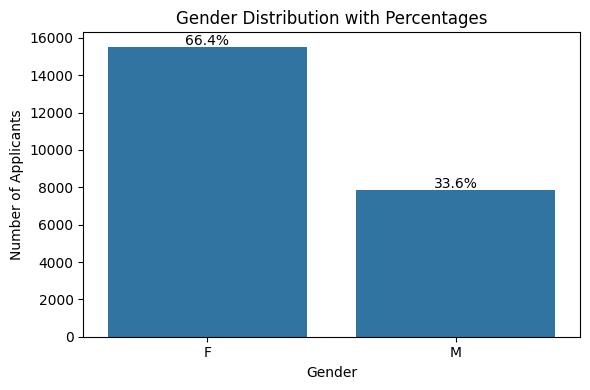

In [23]:
# Males and Females Distribution

# Count gender values
gender_counts = df['CODE_GENDER'].value_counts()
gender_percent = df['CODE_GENDER'].value_counts(normalize=True) * 100

# Create bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values)

# Percentage labels
for i, count in enumerate(gender_counts.values):
    pct = gender_percent.values[i]
    plt.text(i, count + 100, f'{pct:.1f}%', ha='center')

plt.title("Gender Distribution with Percentages")
plt.xlabel("Gender")
plt.ylabel("Number of Applicants")
plt.tight_layout()
plt.show()

The data is not balanced in terms of gener, which is useful to note when analyzing model fairness or drawing conclusions about default risk across genders.

## Loan Types

In [24]:
# Annuity
annuity_bins = [0, 10000, 20000, 30000, 40000, 50000, 70000, 100000, df['AMT_ANNUITY'].max()]
annuity_labels = ['<10k', '10k–20k', '20k–30k', '30k–40k', '40k–50k', '50k–70k', '70k–100k', '100k+']
df['ANNUITY_GROUP'] = pd.cut(df['AMT_ANNUITY'], bins=annuity_bins, labels=annuity_labels)


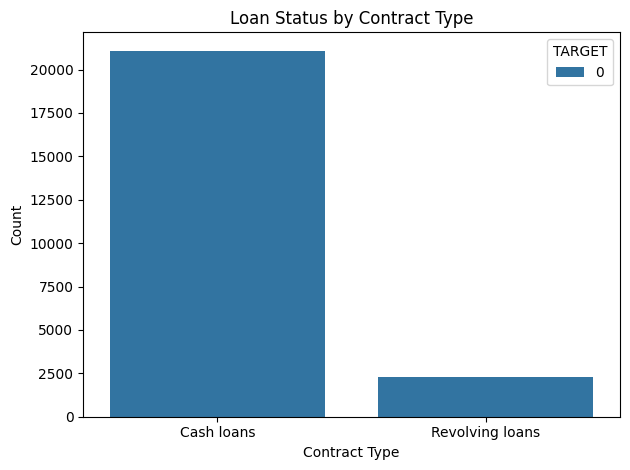

In [25]:
sns.countplot(data=df, x='NAME_CONTRACT_TYPE', hue='TARGET')
plt.title("Loan Status by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(title="TARGET")
plt.tight_layout()
plt.show()

## Loan Status (Open AI, 2025)

This graph shows that the data is highly imbalance. While cash loans are much more prefer than revolving loans, data like this will result in model generlizing favorable toward cash loans.

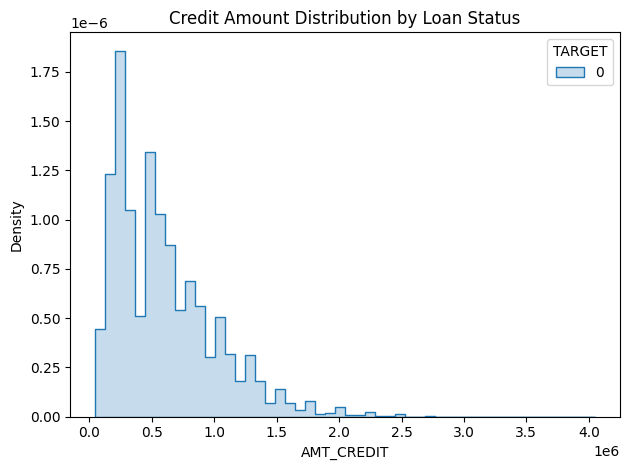

In [26]:
sns.histplot(data=df, x='AMT_CREDIT', hue='TARGET', bins=50, kde=False, element="step", stat='density', common_norm=False)
plt.title("Credit Amount Distribution by Loan Status")
plt.xlabel("AMT_CREDIT")
plt.tight_layout()
plt.show()

This distribution if the graph related to amount credit is heavily skrewed to the left. Most borrowers have loans of 1 millions or less which represnets the majority of the population.

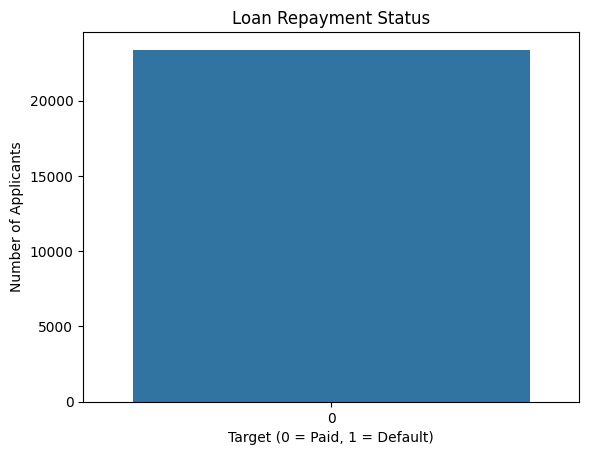

Target distribution:
 TARGET
0    100.0
Name: proportion, dtype: float64


In [27]:
# Plot target distribution
sns.countplot(data=df, x='TARGET')
plt.title("Loan Repayment Status")
plt.xlabel("Target (0 = Paid, 1 = Default)")
plt.ylabel("Number of Applicants")
plt.show()

# Percentages
target_dist = df['TARGET'].value_counts(normalize=True) * 100
print("Target distribution:\n", target_dist.round(2))

### Age and Credit Borrowed

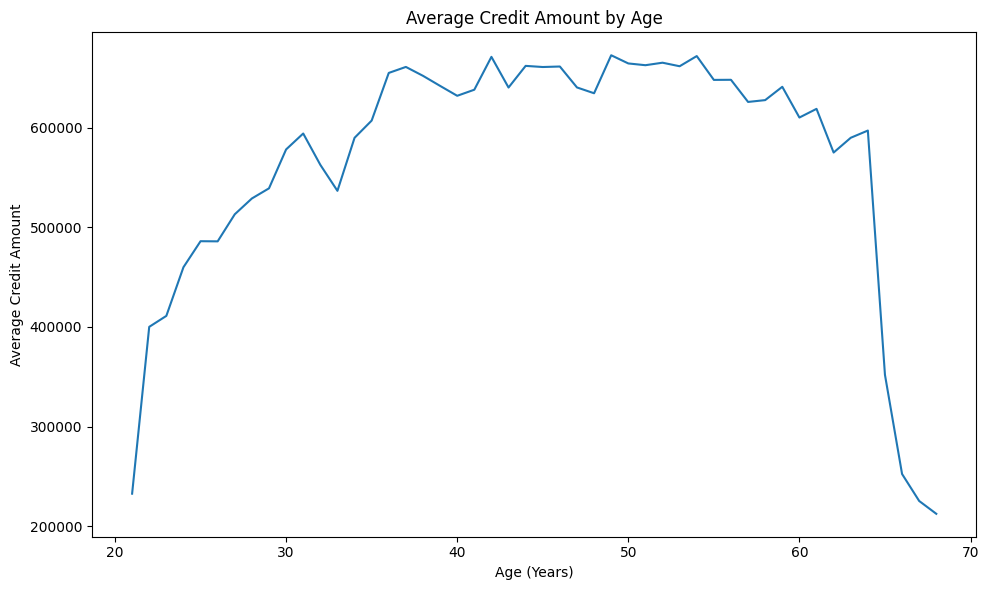

In [28]:
# Line Plot of Average Credit by Age Group
# Create age in years
df['AGE_YEARS'] = (-df['DAYS_BIRTH']) // 365

# Group by age and compute average credit amount
age_credit = df.groupby('AGE_YEARS')['AMT_CREDIT'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_credit, x='AGE_YEARS', y='AMT_CREDIT')
plt.title('Average Credit Amount by Age')
plt.xlabel('Age (Years)')
plt.ylabel('Average Credit Amount')
plt.tight_layout()
plt.show()

This graph shows how the average credit amount varies by age. Applicants between 30 and 60 years old tend to receive higher credit amounts, while very young and older applicants receive less. This trend suggests age is related to borrowing capacity and may influence default risk. It also highlights the potential benefit of grouping ages to reduce noise and improve model accuracy.

## Histogram for data of interests

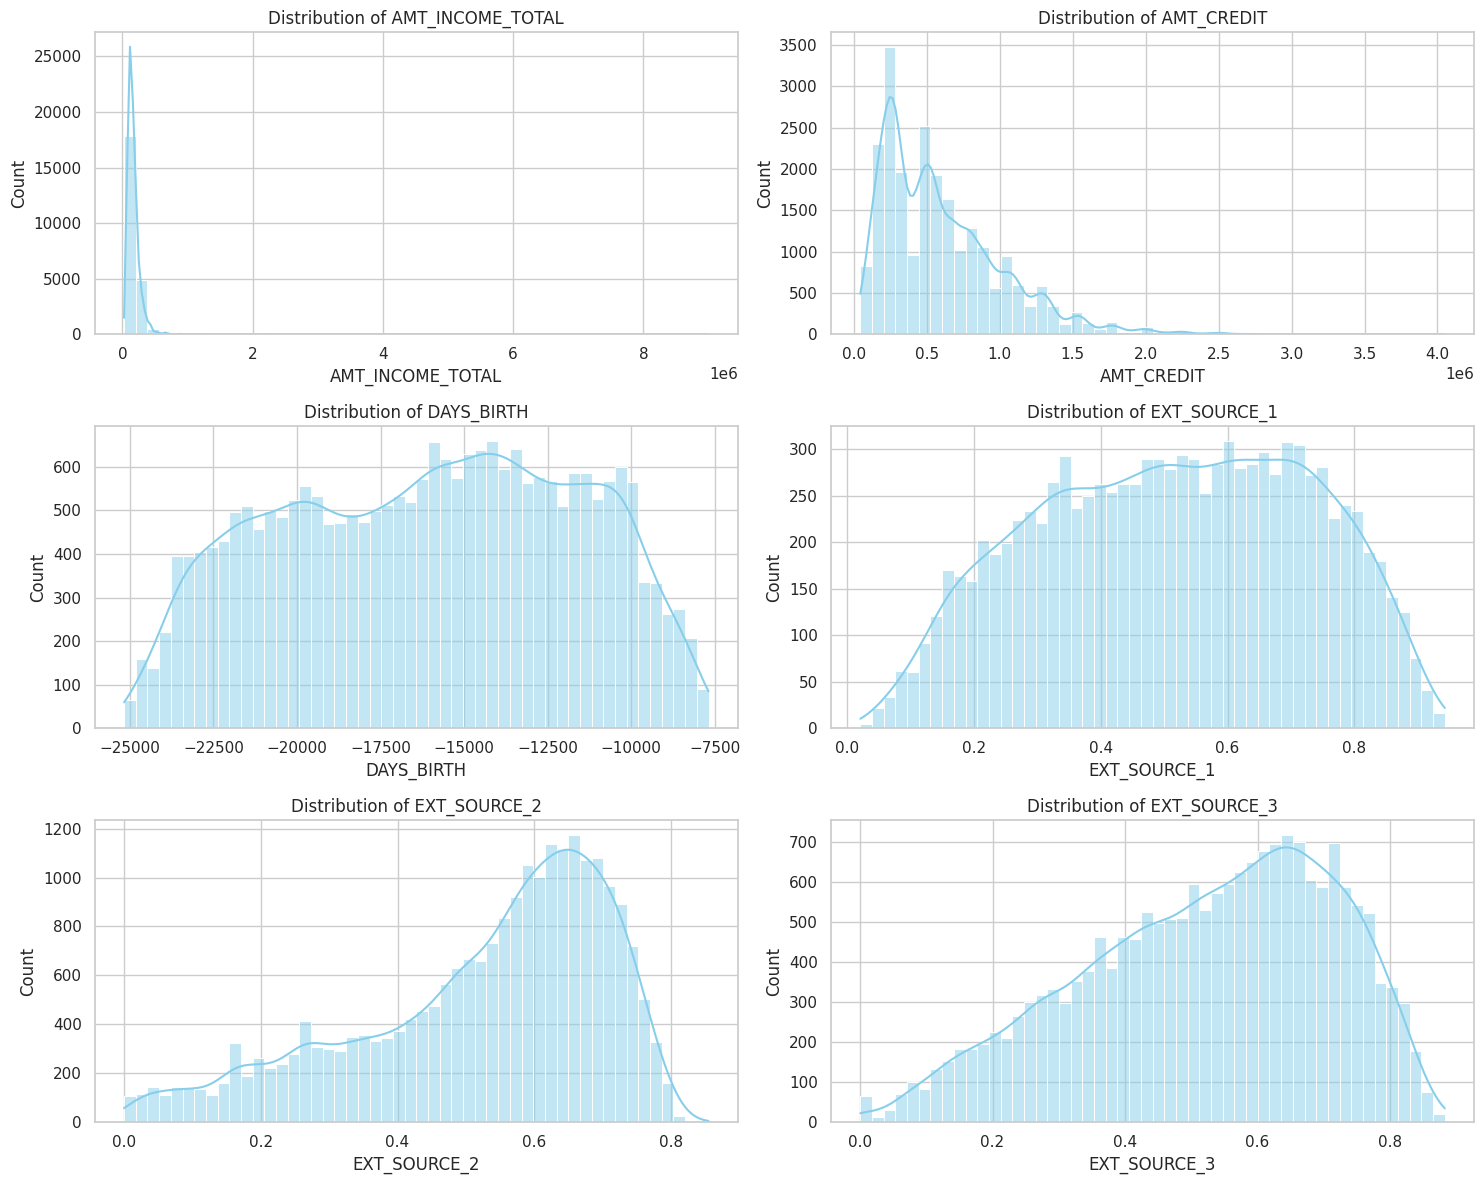

In [29]:
# List of numeric columns to plot
columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH',
           'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

# Set plot style
sns.set(style='whitegrid')
plt.figure(figsize=(15, 12))

# Loop through columns and create subplots
for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=col, bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

These graphs helped me identify where the data is skewed or roughly follows a normal (bell curve) distribution. Recognizing skewed distributions is important because highly skewed features can negatively impact model performance. In such cases, preprocessing steps like normalization or transformation (e.g., log scaling) are necessary to ensure the model can generalize well and make reliable predictions.

## Reference

OpenAI. (2025). ChatGPT (May 12 version) [Large language model]. https://chat.openai.com